In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

# 0. Notebook description

In this notebook, we perform some exploratory experiments with our small training dataset, created in the previous notebook. 
We use the small training set, instead of the complete training set, to improve model training times. 

We compare a simple logistic regression model trained on 1 feature to other simple models trained on more features to determine whether more features offer predictive value. 

# 1. Load small training and validation set

In [3]:
train = pd.read_csv("train_set_small.csv")
train = train.drop(columns=["index", "index.1"]) # remove the columns accidentally created when saving the CSV file in the previous notebook
train

,most_frequent__race_AfricanAmerican,most_frequent__race_Asian,most_frequent__race_Caucasian,most_frequent__race_Hispanic,most_frequent__race_Other,none__payer_code_BC,none__payer_code_CH,none__payer_code_CM,none__payer_code_CP,none__payer_code_DM,...,diagnoses__nan.2,numerical_values__time_in_hospital,numerical_values__num_lab_procedures,numerical_values__num_procedures,numerical_values__num_medications,numerical_values__number_outpatient,numerical_values__number_emergency,numerical_values__number_inpatient,numerical_values__number_diagnoses,readmitted
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.137263,0.361773,-0.781626,-1.735755,-0.29548,-0.204066,-0.504822,-1.237903,>30
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.126210,0.719029,-0.781626,-0.365228,-0.29548,-0.204066,-0.504822,-1.237903,NO
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.463228,0.770065,0.396083,0.008552,-0.29548,-0.204066,-0.504822,0.823550,NO
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.569931,2.301161,0.984937,1.254486,-0.29548,0.824058,-0.504822,0.823550,>30
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.547825,0.004518,2.751500,0.506926,-0.29548,-0.204066,-0.504822,0.823550,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6352,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.463228,-1.373468,0.984937,-0.365228,-0.29548,-0.204066,-0.504822,0.823550,>30
6353,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.126210,1.484577,-0.781626,-0.489821,-0.29548,-0.204066,1.102422,0.308187,<30
6354,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.463228,0.565919,-0.781626,-0.739008,-0.29548,-0.204066,-0.504822,-1.237903,NO
6355,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.800245,1.127321,-0.192771,-1.361975,-0.29548,-0.204066,-0.504822,0.308187,NO


In [4]:
validation = pd.read_csv("validation_set.csv")
validation

,most_frequent__race_AfricanAmerican,most_frequent__race_Asian,most_frequent__race_Caucasian,most_frequent__race_Hispanic,most_frequent__race_Other,none__payer_code_BC,none__payer_code_CH,none__payer_code_CM,none__payer_code_CP,none__payer_code_DM,...,numerical_values__time_in_hospital,numerical_values__num_lab_procedures,numerical_values__num_procedures,numerical_values__num_medications,numerical_values__number_outpatient,numerical_values__number_emergency,numerical_values__number_inpatient,numerical_values__number_diagnoses,index,readmitted
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.463228,-0.505847,-0.781626,-0.988194,-0.295480,-0.204066,-0.504822,0.823550,66543,<30
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.463228,0.004518,-0.781626,-0.863601,-0.295480,-0.204066,0.298800,-0.722540,13478,NO
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.137263,-0.505847,-0.781626,-1.860348,2.131202,0.824058,-0.504822,-0.722540,98787,NO
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.137263,-1.679687,-0.781626,-0.240634,-0.295480,-0.204066,-0.504822,-0.722540,67353,NO
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.463228,0.412810,-0.781626,-0.240634,-0.295480,-0.204066,2.709666,-1.237903,34878,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15890,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.463228,-0.148592,0.396083,0.382332,-0.295480,-0.204066,-0.504822,-2.268630,7170,NO
15891,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.463228,1.280431,-0.192771,-0.365228,-0.295480,-0.204066,1.102422,0.823550,53317,>30
15892,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.126210,-0.097555,-0.781626,-1.361975,-0.295480,-0.204066,-0.504822,-1.753267,6302,>30
15893,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.463228,-0.709993,0.396083,-0.489821,-0.295480,-0.204066,-0.504822,-1.237903,79203,NO


In [6]:
X_train = train.drop("readmitted", axis=1)
y_train = train.readmitted
X_val = validation.drop("readmitted", axis=1)
y_val = validation.readmitted

# 2. Define baseline model performance with a simple 1-feature model
In this section, we create simple logistic regression model and select the most predictive feature to train the model with using SKlearn's SelectKBest, which uses an ANOVA F test to select the most predictive features. The performance of this simple model will serve as our baseline for other models. 

In [7]:
selector = SelectKBest(k=1)

selector.fit(X_train, y_train)
best_feature = selector.get_feature_names_out()
print(best_feature[0])

numerical_values__number_inpatient


In [8]:
# Wrap the LogisticRegression model in a one vs rest classifier, because our problem is a multiclass problem 
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train[best_feature], y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [9]:
y_pred = clf.predict(X_val[best_feature])

In [10]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         <30       0.60      0.00      0.00      1810
         >30       0.51      0.20      0.29      5681
          NO       0.57      0.93      0.71      8404

    accuracy                           0.56     15895
   macro avg       0.56      0.38      0.33     15895
weighted avg       0.55      0.56      0.48     15895



The simple model failed to find any examples of the minority class <30 (patient returned within 30 days). From these results we derive our baseline macro average score 0.33 (we do not use accuracy because accuracy is not a good measure on unbalanced multiclass classification problems).

# 3. Assess the performance of models with varying feature numbers

In this section, we plot the performance of various models (trained with optimal hyperparameters) against the number of features the models were trained with. Our aim in this section is to select the number of features that outputs the best model performance.

Below we define a function that takes training data, a hyperparameter grid, and classifier, and performs a grid search to find the optimal hyperparameters for the classifier. The function then returns the best-performing model.

In [15]:
def get_best_hyperparam_model(X_train, y_train, param_grid, clf):
    cv = 5
 
    # Perform GridSearchCV to find the best parameters
    gridsearch = GridSearchCV(clf, param_grid, cv=cv, scoring='f1_macro')
    gridsearch.fit(X_train, y_train)
    print("Best hyperparameters", gridsearch.best_params_)
    # Return the best estimator
    return gridsearch.best_estimator_

Next, we define the number of features to expose to estimators, and a set of classifiers with their hyperparameter grids that will be used to perform grid search. 

For every number of features we expose to the model, we print the best hyperparameters and save the model's score on the validation data. We plot these scores in the next cell.

In [16]:
number_of_features = [2, 5, 10, 25, 50, 100, 200, 500, 1000]

clf_param_dict = {
            "logistic_regression": (LogisticRegression(), {"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "class_weight": [None, 'balanced']}), 
            "decision_tree": (DecisionTreeClassifier(), {'max_depth': [*np.arange(1,50, 1), None],  "criterion": ['gini', 'entropy']}), 
            "bernoulli_nb" :(BernoulliNB(), {'alpha': [0.1, 0.5, 1.0], 'binarize': [0.0, 0.5, 1.0]}), 
            "gaussian_nb": (GaussianNB(), {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}),
            "knn": (KNeighborsClassifier(), {'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}),
            }

clf_scores = {}

for feature_number in number_of_features:
    print("Number of features: ", feature_number)

    for clf_name, clf_params in clf_param_dict.items():
        print("Classifier: ", clf_params[0])
        if clf_name not in clf_scores:
            clf_scores[clf_name] = []

        clf = clf_params[0]
        params = clf_params[1]

        # Select K Best Features
        selector = SelectKBest(k=feature_number)
        selector.fit(X_train, y_train)

        # Get the selected feature names
        best_features = selector.get_feature_names_out()

        # Use the best features for training

        best_model = get_best_hyperparam_model(X_train[best_features], y_train, params, clf)

        y_pred = best_model.predict(X_val[best_features])
        clf_scores[clf_name].append(f1_score(y_pred, y_val, average='macro'))

Number of features:  2
Classifier:  LogisticRegression()
Best hyperparameters {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2'}
Classifier:  DecisionTreeClassifier()
Best hyperparameters {'criterion': 'gini', 'max_depth': 1}
Classifier:  BernoulliNB()
Best hyperparameters {'alpha': 0.1, 'binarize': 0.0}
Classifier:  GaussianNB()
Best hyperparameters {'var_smoothing': 1e-09}
Classifier:  KNeighborsClassifier()
Best hyperparameters {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
Number of features:  5
Classifier:  LogisticRegression()
Best hyperparameters {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2'}
Classifier:  DecisionTreeClassifier()
Best hyperparameters {'criterion': 'gini', 'max_depth': 13}
Classifier:  BernoulliNB()
Best hyperparameters {'alpha': 0.1, 'binarize': 0.0}
Classifier:  GaussianNB()
Best hyperparameters {'var_smoothing': 1e-09}
Classifier:  KNeighborsClassifier()
Best hyperparameters {'algorithm': 'brute', 'n_neighbors': 9, 'weights

Below we plot the scores of the best-performing models for every feature number.

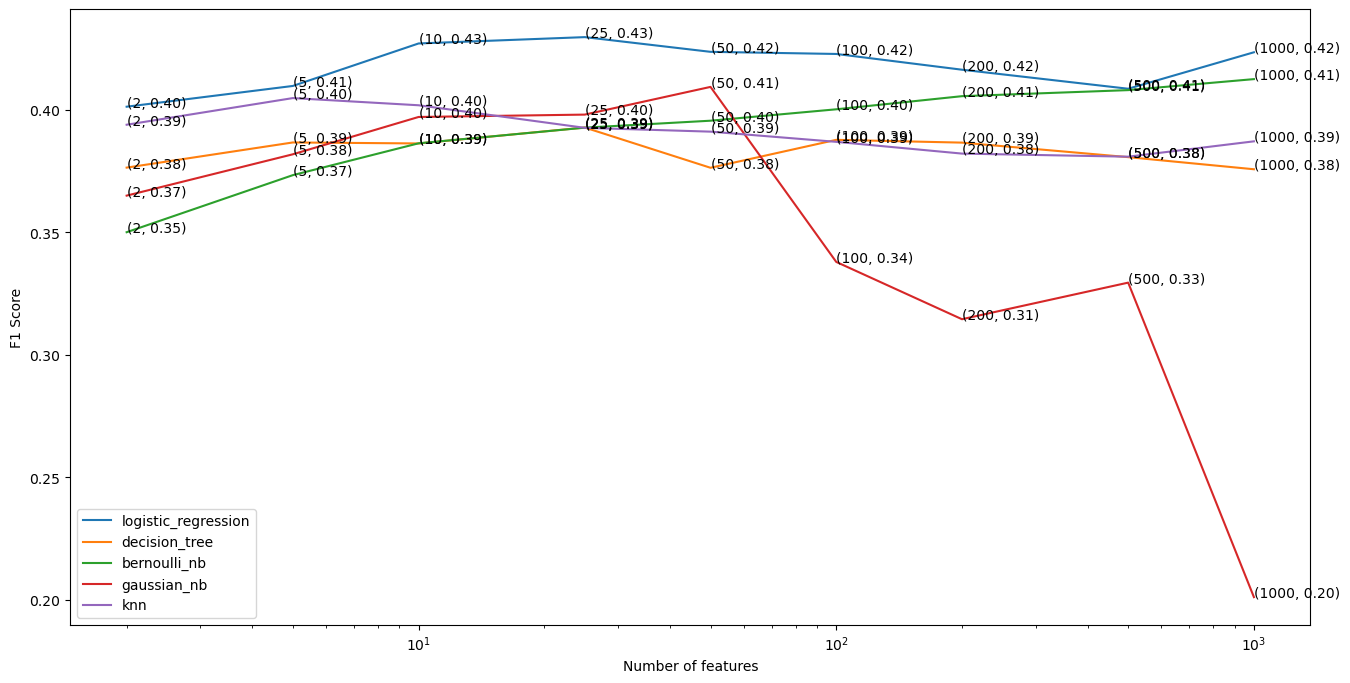

In [19]:
plt.figure(figsize=(16, 8))
for clf_name, clf_score_list in clf_scores.items():
    plt.plot(number_of_features, clf_score_list)
    for xy in zip(number_of_features, clf_score_list):
        plt.annotate('(%.0f, %.2f)' % xy, xy=xy, textcoords='data')
plt.legend(clf_scores.keys())
plt.xscale("log")
plt.xlabel("Number of features")
plt.ylabel("F1 Score")
plt.show()

The graph shows that 25 features produces the best performance on the validation set, so the machine learning models will be trained with 25 features. 
Below are the hyperparameter sets that perform best on 25 features for each estimator.


Classifier:  LogisticRegression()

- Best hyperparameters: {'C': 1000.0, 'class_weight': 'balanced', 'penalty': 'l2'}


Classifier:  DecisionTreeClassifier()

- Best hyperparameters: {'criterion': 'gini', 'max_depth': 14}


Classifier:  BernoulliNB()

- Best hyperparameters: {'alpha': 0.1, 'binarize': 0.0}


Classifier:  GaussianNB()

- Best hyperparameters: {'var_smoothing': 1e-05}


Classifier:  KNeighborsClassifier()

- Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

Below is the f1 macro average score of each tuned estimator on 25 features:

In [29]:
for clf_name, clf_score_list in clf_scores.items():
    print("Classifier:", clf_name)
    for feature_number, score in zip(number_of_features, clf_score_list):
        if feature_number == 25:
            print("f1 score:", round(score, 5))
    print()

Classifier: logistic_regression
f1 score: 0.42981

Classifier: decision_tree
f1 score: 0.39287

Classifier: bernoulli_nb
f1 score: 0.39283

Classifier: gaussian_nb
f1 score: 0.39816

Classifier: knn
f1 score: 0.39275



# 4. Model selection

The experiments in this notebook found that the best performing models, in order, are as follows:

1. Logistic regression
2. Gaussian NB
3. Decision tree
4. Bernoulli NB
6. KNN

**Takeaways:**

- After LogisticRegression, the difference in f1 macro scores between each estimator is less than 0.01.
- LogisticRegression performed better than any other estimator, with a 0.03 increase in f1 macro score over the other estimators. 
- Using 25 features, along with hyperparameter tuning, was able to achieve only a roughly 0.06 increase in f1 macro scores of non-logistic regression models compared to the baseline simple estimator, whose f1 macro score was 0.33. 